In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

#*Tendência - Direção
#*Sazonalidade - Recorrência das oscilações
#*Resíduo - O que sobra do sinal

In [5]:
df_path="https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
df=pd.read_csv(df_path)
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [7]:
df.index = pd.to_datetime(df.DATE, format="%m-%d-%Y")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [9]:
df.drop("DATE", inplace=True, axis=1)

In [10]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [11]:
df.loc["1985-05-01"]

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

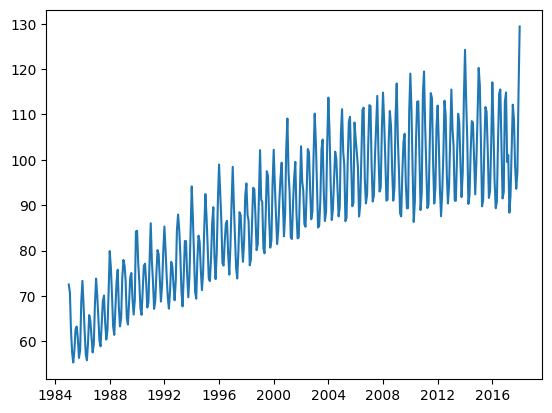

In [12]:
plt.plot(df.index, df.Value)

In [13]:
resultados = seasonal_decompose(df)

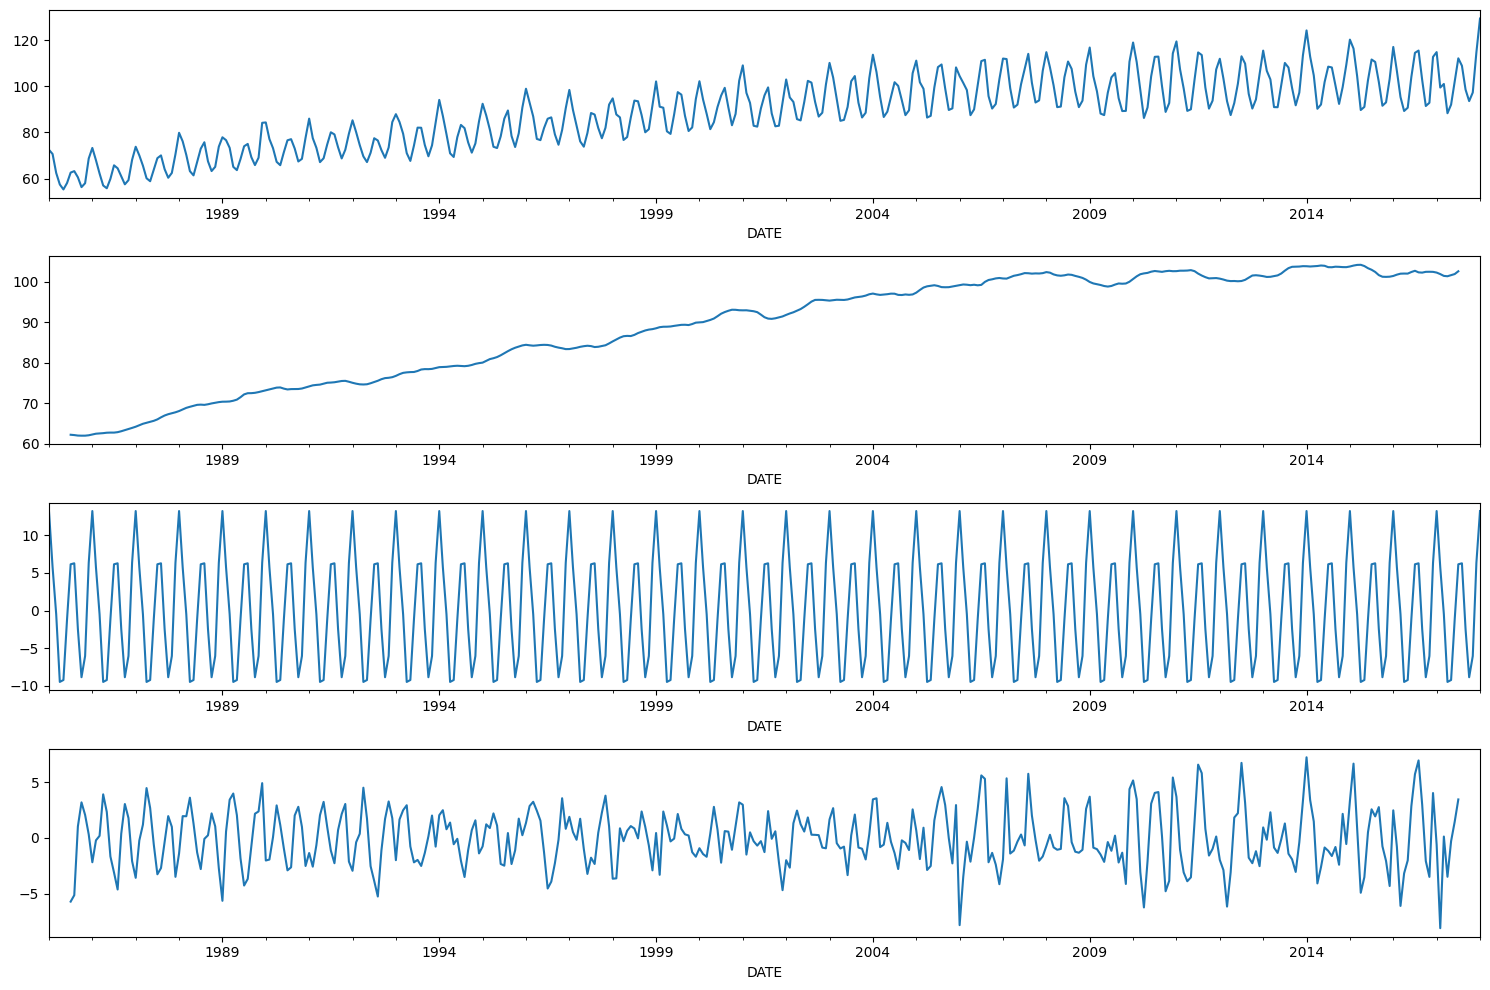

In [14]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)
plt.tight_layout()

#Intentificando Estacionária ou não Estacionária

## Teste ADF - (Augmented Dickey Fuller)

  H0 - Hipótese Nula (não Estacionária)
  
  H1 - Hipótese Alternativa (rejeição da hipótese nula)


p/value = 0.05 (5%) , então rejeitamos H0 com um nível de confiança de 95%

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
sns.set_style("darkgrid")

In [17]:
x=df.Value.values

In [18]:
result = adfuller(x)

print("teste ABF")
print(f"Teste Estatistico: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Valores Críticos: ")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

teste ABF
Teste Estatistico: -2.256990350047235
p-value: 0.1862146911658712
Valores Críticos: 
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


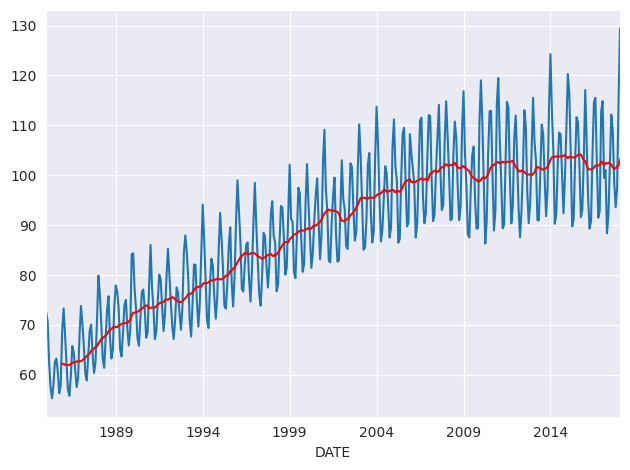

In [19]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color="r")
plt.tight_layout()


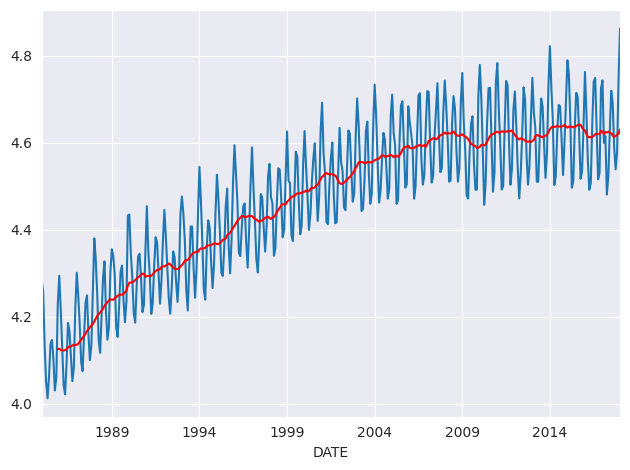

In [20]:
df_log = np.log(df)
ma_log=df_log.rolling(12).mean()

ma = df.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

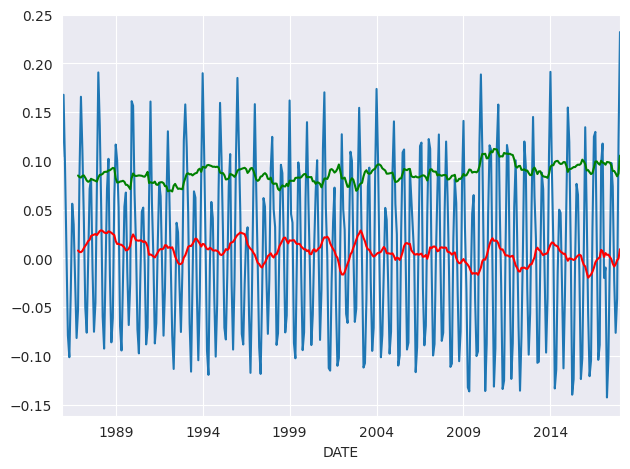

In [21]:
df_s=(df_log-ma_log).dropna()

ma_s = df_s.rolling(12).mean()
std=df_s.rolling(12).std()

ma = df.rolling(12).mean()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color="r")
std.plot(ax=ax, legend=False, color="g")
plt.tight_layout()

In [22]:
x_s=df_s.Value.values
result_s = adfuller(x_s)

print("teste ABF")
print(f"Teste Estatistico: {result_s[0]}")
print(f"p-value: {result_s[1]}")
print(f"Valores Críticos: ")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")


teste ABF
Teste Estatistico: -5.2115861853654355
p-value: 8.32563975994627e-06
Valores Críticos: 
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


teste ABF
Teste Estatistico: -7.651129568145172
p-value: 1.788126735435739e-11
Valores Críticos: 
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


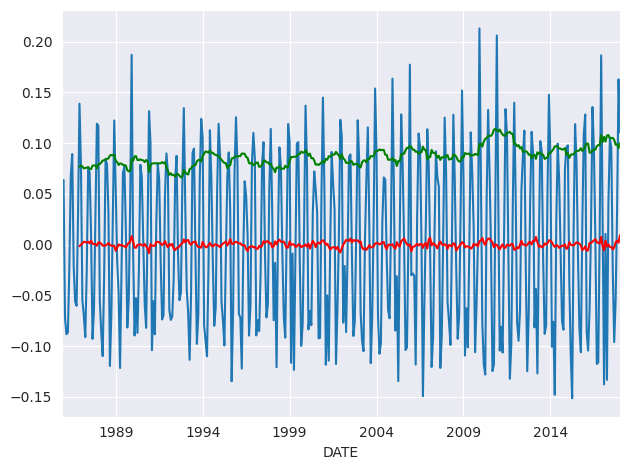

In [23]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color="r")
std_diff.plot(ax=ax, legend=False, color="g")
plt.tight_layout()

x_diff=df_diff.Value.dropna().values
result_diff = adfuller(x_diff)

print("teste ABF")
print(f"Teste Estatistico: {result_diff[0]}")
print(f"p-value: {result_diff[1]}")
print(f"Valores Críticos: ")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [ ]:
#Arima (AR) : Autoregressivel, I: Integrado, MA:Moving Average

#A(x,y,z) -> ACF, PACF

In [35]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

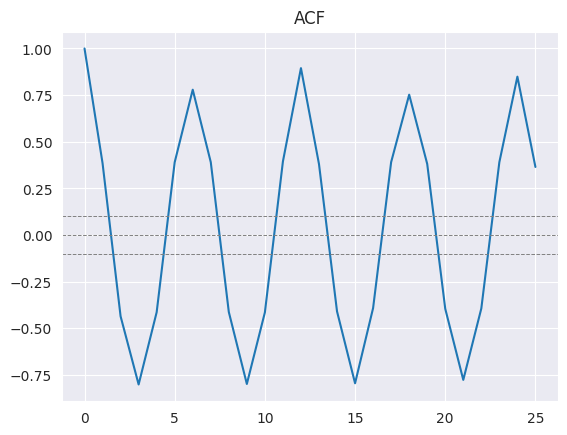

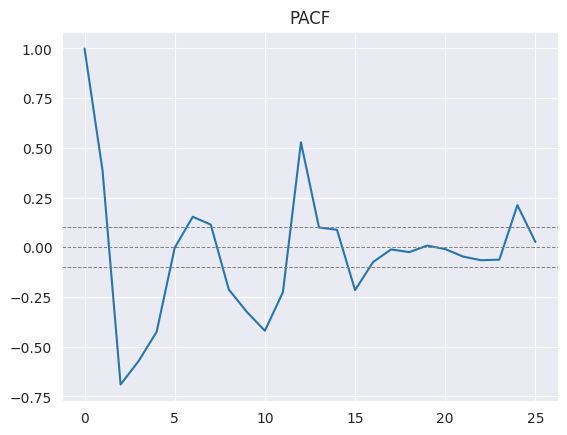

In [37]:
#5% ACF
plt.plot(lag_acf)
plt.axhline(y=-1.96/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)
plt.axhline(y=+1.96/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)
plt.axhline(y=0/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)

plt.title("ACF")

plt.show()

plt.plot(lag_pacf)
plt.axhline(y=-1.96/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)
plt.axhline(y=+1.96/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)
plt.axhline(y=0/(np.sqrt(len((df_diff) -1))), linestyle="--", color="gray", linewidth=0.7)

plt.title("PACF")

plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [46]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



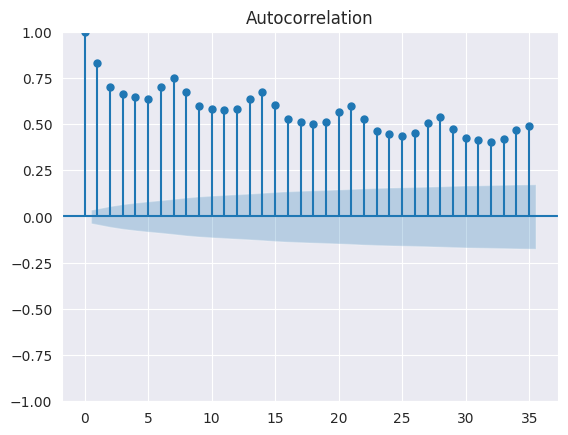

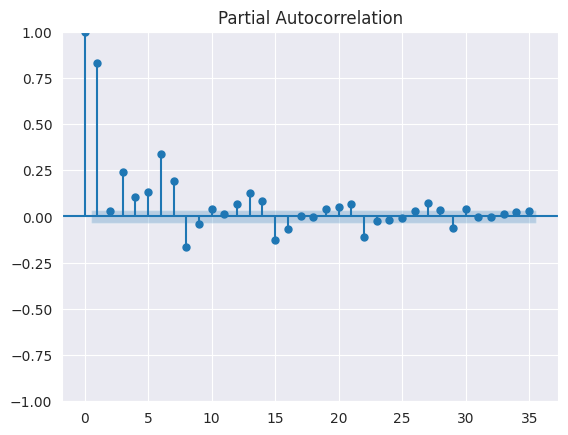

In [47]:
plot_acf(df.y)
plot_pacf(df.y)

plt.show()

#Gerando um DataFrame já com data como datetime64

In [24]:
df_path="https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
df1=pd.read_csv(df_path, parse_dates=[0], index_col="DATE")
df1.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


#PROPHET - Meta --> analise de time series
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [26]:
# Python
import pandas as pd
from prophet import Prophet

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [28]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wtx4hze/gi8ht0fl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4wtx4hze/q818t0be.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68120', 'data', 'file=/tmp/tmp4wtx4hze/gi8ht0fl.json', 'init=/tmp/tmp4wtx4hze/q818t0be.json', 'output', 'file=/tmp/tmp4wtx4hze/prophet_model7jhz9q8k/prophet_model-20230811001935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208305,7.472589,8.946701
3266,2017-01-16,8.533309,7.793416,9.285043
3267,2017-01-17,8.320714,7.616084,9.029411
3268,2017-01-18,8.153356,7.456583,8.883750
3269,2017-01-19,8.165279,7.490607,8.885691


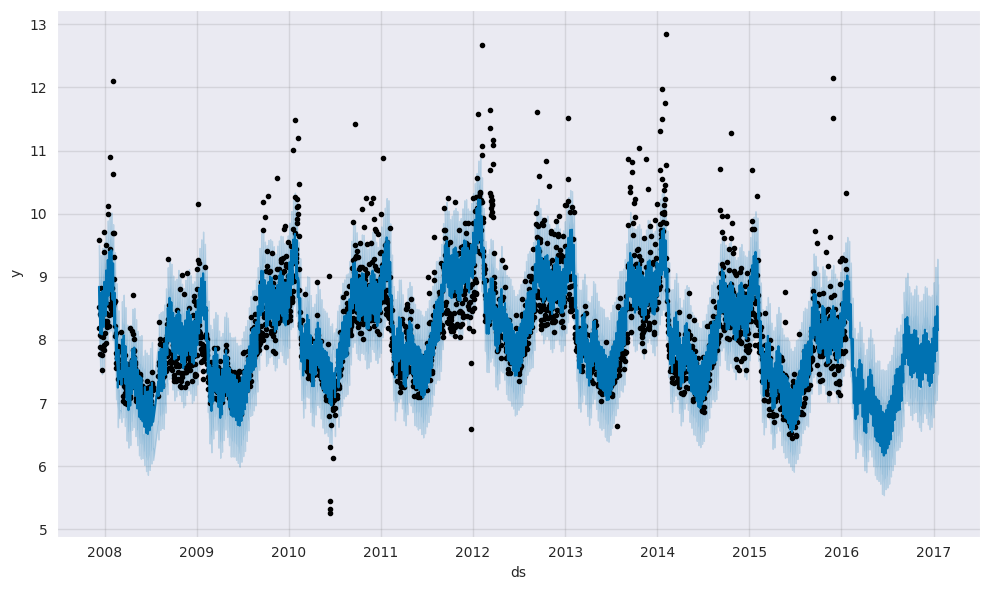

In [31]:
fig1 = m.plot(forecast)

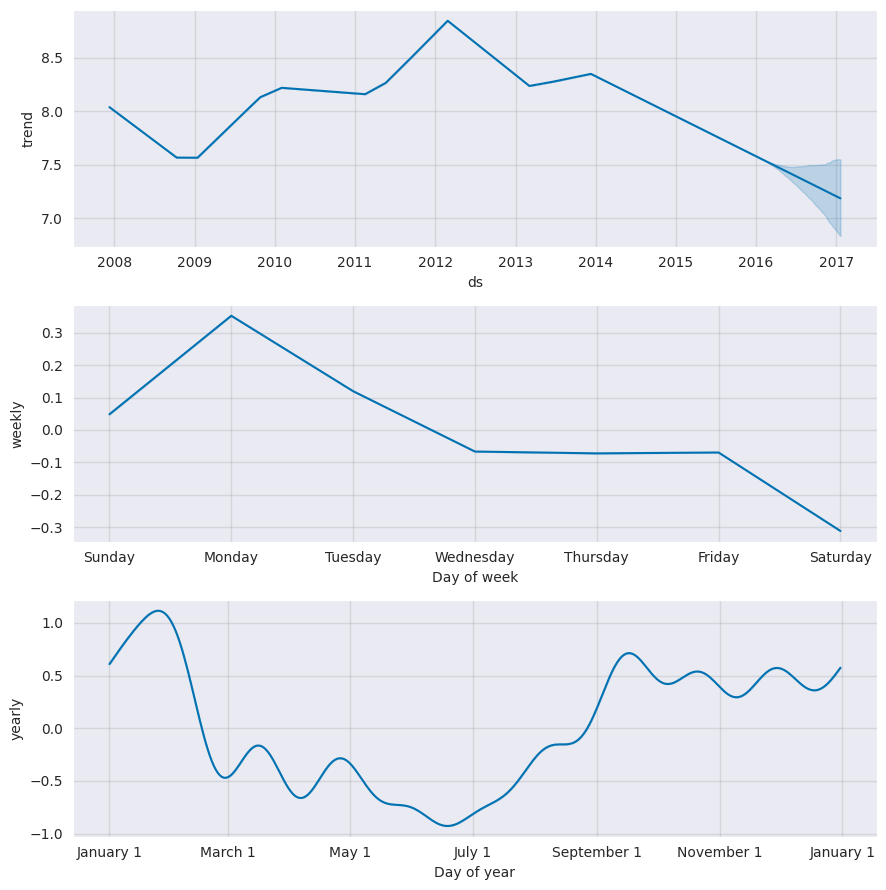

In [32]:
fig2 = m.plot_components(forecast)

In [33]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [34]:
plot_components_plotly(m, forecast)